<a href="https://colab.research.google.com/github/Darshil420/deeplearning_imageclassifier/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and datasets

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

loading and normalising the dataset

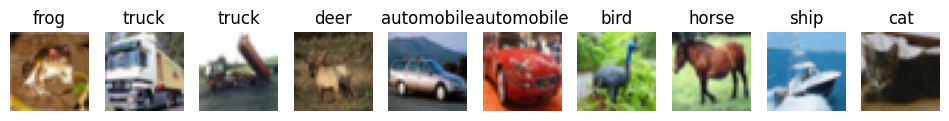

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
#normalisation
x_train,x_test=x_train/255.0,x_test/255.0
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(12,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i]])
plt.show()


CNN architecture

In [4]:
with tf.device("/GPU:0"):
  model=models.Sequential([
      # Input Layer - Fixed approach
      layers.Input(shape=(32,32,3)),

      # First Convolutional Block
      layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.25),

      # Second Convolutional Block
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.25),

      # Third Convolutional Block - Adjusted
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D((2,2)),
      layers.Dropout(0.25),

      # Fourth Convolutional Block - Removed pooling to prevent size issues
      layers.Conv2D(256,(3,3),activation='relu',padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(256,(3,3),activation='relu',padding='same'),
      layers.Dropout(0.25),

      # Transition to dense layers
      layers.GlobalAveragePooling2D(),
      layers.Dropout(0.5),

      # Dense Layers
      layers.Dense(512,activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(256,activation='relu'),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(10,activation='softmax')
  ])


model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,442,730 (5.50 MB)

 Trainable params: 1,440,234 (5.49 MB)

 Non-trainable params: 2,496 (9.75 KB)

model compilation

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model training

In [6]:
history=model.fit(x_train, y_train,epochs=20,validation_data=(x_test, y_test))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.2317 - loss: 2.3869 - val_accuracy: 0.4526 - val_loss: 1.4604
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5077 - loss: 1.3498 - val_accuracy: 0.4869 - val_loss: 1.7153
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6311 - loss: 1.0700 - val_accuracy: 0.6372 - val_loss: 1.0598
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6885 - loss: 0.9211 - val_accuracy: 0.7212 - val_loss: 0.8003
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7225 - loss: 0.8317 - val_accuracy: 0.7507 - val_loss: 0.7232
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7495 - loss: 0.7597 - val_accuracy: 0.7366 - val_loss: 0.7840
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7669 - loss: 0.7026 - val_accuracy: 0.7510 - val_loss: 0.7356
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7869 - loss: 

plotting accuracy and loss

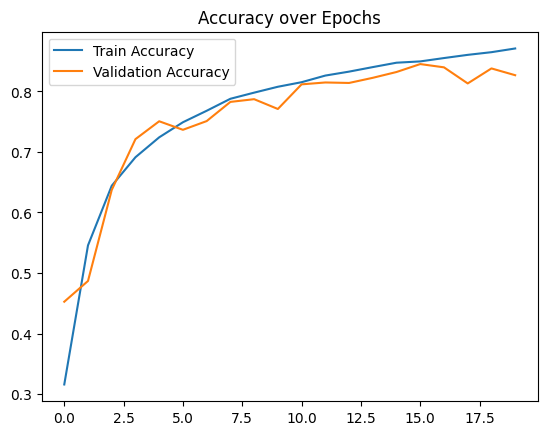

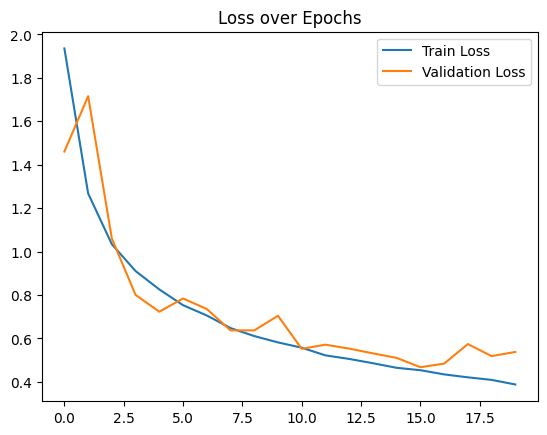

In [7]:
#training vs testing accuracy
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()
#training vs testing loss
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


model evaluation

In [8]:
test_loss,test_acc=model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy:{test_acc*100:.2f}%')


313/313 - 1s - 3ms/step - accuracy: 0.8268 - loss: 0.5377
Test Accuracy:82.68%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


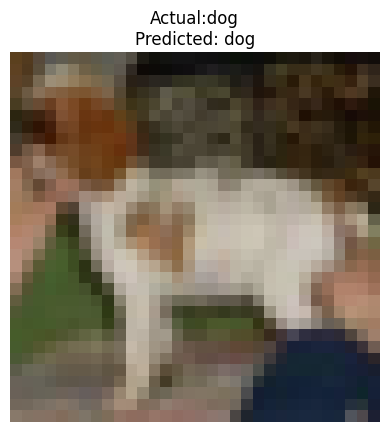

In [9]:
predictions=model.predict(x_test)

def show_prediction(i):
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_names[y_test[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

show_prediction(12)


In [ ]:
%load_ext tensorboard